# Math for Data Scientists: Linear Algebra and Gradient Descent

In [86]:
import numpy as np
import pandas as pd
from seaborn import load_dataset
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

gems = load_dataset('diamonds')
%matplotlib inline

## Objectives

- Correctly add and multiply matrices
- Explain and use the concept of a gradient
- Explain the algorithm of gradient descent
- Describe the effect of the "learning rate" in the algorithm

[Here](https://www.analyticsvidhya.com/blog/2019/07/10-applications-linear-algebra-data-science/) is a useful resource on the applications of linear algebra to data science. We'll explore a few here.

## Linear Algebra

### Vectors and Matrices

In the context of linear algebra, a single number is a 0-dimensional entity called a **scalar**. But it is often useful to have data in the form of a 1-dimensional object called a **vector**, which can be thought of as a list of scalars. Think here of a `pandas` Series. And in addition to the values that compose the vector, we can characterize the vector as a whole as having a **magnitude** and a **direction**.

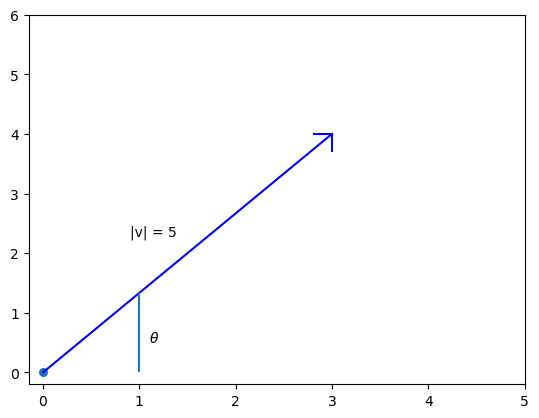

In [87]:
fig, ax = plt.subplots()

ax.plot([0, 3], [0, 4], 'b')
ax.vlines(1, ymin=0, ymax=4/3)
ax.scatter(0, 0, s=30)

# arrowhead!
ax.vlines(3, ymin=3.7, ymax=4, colors='b')
ax.hlines(4, xmin=2.8, xmax=3, colors='b')
ax.annotate('$\\theta$', xy=(1.1, 0.5))
ax.annotate('|v| = 5', xy=(0.9, 2.3))
ax.set_xlim(right=5)
ax.set_ylim(top=6);

We have been working all along with arrays and data frames that have a tabular structure of rows and columns. Such a 2-dimensional structure of numerical elements is known in linear algebra as a **matrix**.

In [88]:
gems.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [89]:
gems.head().values

array([[0.23, 'Ideal', 'E', 'SI2', 61.5, 55.0, 326, 3.95, 3.98, 2.43],
       [0.21, 'Premium', 'E', 'SI1', 59.8, 61.0, 326, 3.89, 3.84, 2.31],
       [0.23, 'Good', 'E', 'VS1', 56.9, 65.0, 327, 4.05, 4.07, 2.31],
       [0.29, 'Premium', 'I', 'VS2', 62.4, 58.0, 334, 4.2, 4.23, 2.63],
       [0.31, 'Good', 'J', 'SI2', 63.3, 58.0, 335, 4.34, 4.35, 2.75]],
      dtype=object)

Sometimes we want 3- or even higher-dimensional objects. Think for example of a digital image where we record the red, green, and blue values *for each pixel in the 2d array*. The linear algebraic abstraction we need for such an object is called a **tensor**.

In [90]:
np.random.seed(42)

tensor = np.round(np.random.rand(3, 5, 5), 1)
tensor

array([[[0.4, 1. , 0.7, 0.6, 0.2],
        [0.2, 0.1, 0.9, 0.6, 0.7],
        [0. , 1. , 0.8, 0.2, 0.2],
        [0.2, 0.3, 0.5, 0.4, 0.3],
        [0.6, 0.1, 0.3, 0.4, 0.5]],

       [[0.8, 0.2, 0.5, 0.6, 0. ],
        [0.6, 0.2, 0.1, 0.9, 1. ],
        [0.8, 0.3, 0.1, 0.7, 0.4],
        [0.1, 0.5, 0. , 0.9, 0.3],
        [0.7, 0.3, 0.5, 0.5, 0.2]],

       [[1. , 0.8, 0.9, 0.9, 0.6],
        [0.9, 0.1, 0.2, 0. , 0.3],
        [0.4, 0.3, 0.8, 0.4, 0.3],
        [0.5, 0.1, 0.8, 0.1, 1. ],
        [0.8, 0.2, 0. , 0.8, 0.7]]])

In [91]:
tensor[0][0][0]

0.4

### Matrix Arithmetic

Matrices can be added and multiplied, and there are other distinctive operations on matrices that are often useful.

<details>
    <summary><b>Matrix Addition</b>: Click for Illustration</summary>
$\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{bmatrix}
+
\begin{bmatrix}
b_{11} & b_{12} \\
b_{21} & b_{22}
\end{bmatrix}
=
\begin{bmatrix}
a_{11} + b_{11} & a_{12} + b_{12} \\
a_{21} + b_{21} & a_{22} + b_{22}
\end{bmatrix}
$
    </details>

In [92]:
np.random.seed(42)
my_matrix1 = np.random.randint(low=1, high=11, size=(2, 2))
my_matrix1

array([[7, 4],
       [8, 5]])

In [93]:
my_matrix2 = np.random.randint(low=1, high=11, size=(2, 2))
my_matrix2

array([[ 7, 10],
       [ 3,  7]])

In [94]:
my_matrix1 + my_matrix2

array([[14, 14],
       [11, 12]])

<details>
    <summary><b>Matrix Multiplication</b>: Click for Illustration</summary>
$$
\begin{equation}
\begin{bmatrix}
a_{1,1} & a_{1,2} \\
a_{2,1} & a_{2,2}
\end{bmatrix}
\begin{bmatrix}
b_{1,1} & b_{1,2} \\
b_{2,1} & b_{2,2}
\end{bmatrix}
=
\begin{bmatrix}
a_{1,1}\times b_{1,1} + a_{1,2}\times b_{2,1} & a_{1,1}\times b_{1,2} + a_{1,2}\times b_{2,2} \\
a_{2,1}\times b_{1,1} + a_{2,2}\times b_{2,1} & a_{2,1}\times b_{1,2} + a_{2,2}\times b_{2,2}
\end{bmatrix}
\end{equation}
$$
    </details>

In [95]:
my_matrix1.dot(my_matrix2)

array([[ 61,  98],
       [ 71, 115]])

In [96]:
# Python short hand
my_matrix1 @ my_matrix2

array([[ 61,  98],
       [ 71, 115]])

In [97]:
# Not the same as 'multiplication'
my_matrix1 * my_matrix2

array([[49, 40],
       [24, 35]])

#### Application: Correlation

We can express covariance and correlation matrices as linear-algebraic transformations:

For a centered data matrix $M$:
- $cov(M) = \frac{1}{n-1}M^TM$, where $n$ is the number of observations.

A centered data matrix is one whose column means are all 0.

This equation makes use of the **transpose** of a matrix $M$, $M^T$, which is the matrix that results from swapping the rows and columns of $M$. You can also think of this as a *reflection* of the elements of $M$ about the main diagonal of $M$.

In [98]:
my_matrix1

array([[7, 4],
       [8, 5]])

In [99]:
my_matrix1.T

array([[7, 8],
       [4, 5]])

In [100]:
my_matrix_transposed = my_matrix1.T
my_matrix_transposed

array([[7, 8],
       [4, 5]])

Let's illustrate this equation. Suppose we have ten observations (rows) for each of three variables (columns).

In [101]:
np.random.seed(42)
mat_1 = np.random.rand(10, 3)
mat_1

array([[0.37454012, 0.95071431, 0.73199394],
       [0.59865848, 0.15601864, 0.15599452],
       [0.05808361, 0.86617615, 0.60111501],
       [0.70807258, 0.02058449, 0.96990985],
       [0.83244264, 0.21233911, 0.18182497],
       [0.18340451, 0.30424224, 0.52475643],
       [0.43194502, 0.29122914, 0.61185289],
       [0.13949386, 0.29214465, 0.36636184],
       [0.45606998, 0.78517596, 0.19967378],
       [0.51423444, 0.59241457, 0.04645041]])

In [102]:
mat_1_centered = mat_1 - np.mean(mat_1, axis=0)

mat_1_centered.T.dot(mat_1_centered) / 9

array([[ 0.06245653, -0.03833006, -0.01323947],
       [-0.03833006,  0.10612618, -0.00378735],
       [-0.01323947, -0.00378735,  0.08823377]])

In [103]:
cov = np.cov(mat_1, rowvar=False)

cov

array([[ 0.06245653, -0.03833006, -0.01323947],
       [-0.03833006,  0.10612618, -0.00378735],
       [-0.01323947, -0.00378735,  0.08823377]])

In [104]:
np.corrcoef(mat_1, rowvar=False)

array([[ 1.        , -0.4708031 , -0.17834632],
       [-0.4708031 ,  1.        , -0.03913878],
       [-0.17834632, -0.03913878,  1.        ]])

<details>
    <summary>Bonus: Correlation Matrices</summary>
    To calculate a correlation matrix, we can multiply the covariance matrix on both sides by a diagonal matrix of the reciprocals of the standard deviations of the columns. Source: https://blogs.sas.com/content/iml/2010/12/10/converting-between-correlation-and-covariance-matrices.html.

<code>stds = np.sqrt(np.diag(cov))
np.diag(stds\*\*-1).dot(cov).dot(np.diag(stds\*\*-1))
np.corrcoef(mat_1, rowvar=False)
</code>
    </details>

### Linear Regression and Linear Algebra

Consider now a typical dataset and the associated multiple linear regression problem. We have many observations (rows), each of which consists of a set of values both for the predictors (columns, i.e. the independent variables) and for the target (the dependent variable).

For the equation $A\vec{x} = \vec{c}$, we can think of the values of the independent variables (i.e. the data matrix, "X") as our matrix $A$ and the vector of coefficients as $\vec{x}$ and of the values of the dependent variable (i.e. the target, "y") as our output vector $\vec{c}$.

The task here is, in effect, to solve for $\vec{\beta}$, where we have that $A\vec{\beta} = \vec{c}$, except in general we'll have more rows than columns. But more rows than columns means more equations than unknowns, which means that in general **there is no solution**. This is why instead we go for an optimization--in our case, a best-fit line. So we have $A\vec{\beta}\approx\vec{c}$.

Using $a$ for our independent variables and $c$ for our dependent variable, we have:


\begin{equation}
\beta_1\begin{bmatrix}
a_{1,1} \\
. \\
. \\
. \\
a_{m,1}
\end{bmatrix} +
... + \beta_n\begin{bmatrix}
a_{1,n} \\
. \\
. \\
. \\
a_{m,n}
\end{bmatrix} \approx \begin{bmatrix}
c_1 \\
.  \\
.  \\
.  \\
c_m
\end{bmatrix}
\end{equation}

#### Linear Algebra Solves the Best-Fit Line Problem

If we have a matrix of predictors $X$ and a target column $y$, we can express $\vec{\beta}$, the vectorized parameters of the best-fit line, as  follows:

$\large\vec{\beta} = (X^TX)^{-1}X^Ty$.

$(X^TX)^{-1}X^T$ is sometimes called the *pseudo-inverse* of $X$.

Let's see this in action:

In [105]:
np.random.seed(42)

x = np.array(list(zip(np.random.normal(size=10),
                          np.array(np.random.normal(size=10, loc=2)))))
y = np.array(np.random.exponential(size=10))

x

array([[ 0.49671415,  1.53658231],
       [-0.1382643 ,  1.53427025],
       [ 0.64768854,  2.24196227],
       [ 1.52302986,  0.08671976],
       [-0.23415337,  0.27508217],
       [-0.23413696,  1.43771247],
       [ 1.57921282,  0.98716888],
       [ 0.76743473,  2.31424733],
       [-0.46947439,  1.09197592],
       [ 0.54256004,  0.5876963 ]])

In [106]:
import statsmodels.api as sm

In [107]:
x= sm.add_constant(x)

In [108]:
x

array([[ 1.        ,  0.49671415,  1.53658231],
       [ 1.        , -0.1382643 ,  1.53427025],
       [ 1.        ,  0.64768854,  2.24196227],
       [ 1.        ,  1.52302986,  0.08671976],
       [ 1.        , -0.23415337,  0.27508217],
       [ 1.        , -0.23413696,  1.43771247],
       [ 1.        ,  1.57921282,  0.98716888],
       [ 1.        ,  0.76743473,  2.31424733],
       [ 1.        , -0.46947439,  1.09197592],
       [ 1.        ,  0.54256004,  0.5876963 ]])

In [109]:
y

array([0.60893469, 1.53793601, 0.22273586, 0.72202916, 0.89750472,
       0.04756385, 0.93533302, 0.18696125, 0.06726393, 2.97368779])

# Not square, won't work
np.linalg.solve(x, y)

In [110]:
np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

array([ 1.3788063 ,  0.07945643, -0.49151748])

In [111]:
LinearRegression(fit_intercept=True).fit(x, y).coef_

array([ 0.        ,  0.07945643, -0.49151748])

In [112]:
LinearRegression(fit_intercept=True).fit(x, y).intercept_

1.3788063038763478

In [113]:
sm.OLS(y, x).fit().summary()

/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                 -0.050
Method:                 Least Squares   F-statistic:                    0.7873
Date:                Wed, 13 Dec 2023   Prob (F-statistic):              0.492
Time:                        16:32:49   Log-Likelihood:                -11.496
No. Observations:                  10   AIC:                             28.99
Df Residuals:                       7   BIC:                             29.90
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3788      0.617      2.236      0.060      -0.079       2.837
x1             0.0795      0.424      0.188      0.857      -0.922       1.081
x2            -0.4915      0.405     -1.212      0.265      -1.450       0.467
==============================================================================
Omnibus:                        7.646   Durbin-Watson:                   1.708
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                3.252
Skew:                           1.338   Prob(JB):                        0.197
Kurtosis:                       3.801   Cond. No.                         4.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Gradient Descent

Gradient descent is a technique from *calculus* that underlies the operation of many machine learning modeling algorithms. We'll use it here to approach the regression problem of finding the line of best fit.

### Solving the Line of Best Fit by Guessing

Let's say we have some data below: 

In [114]:
# Randomly created data in x & y
np.random.seed(27)

x = np.random.rand(30, 1).reshape(30)
y_randterm = np.random.normal(0, 3, 30)
y = 3 + 50 * x + y_randterm

Here's the data plotted out:

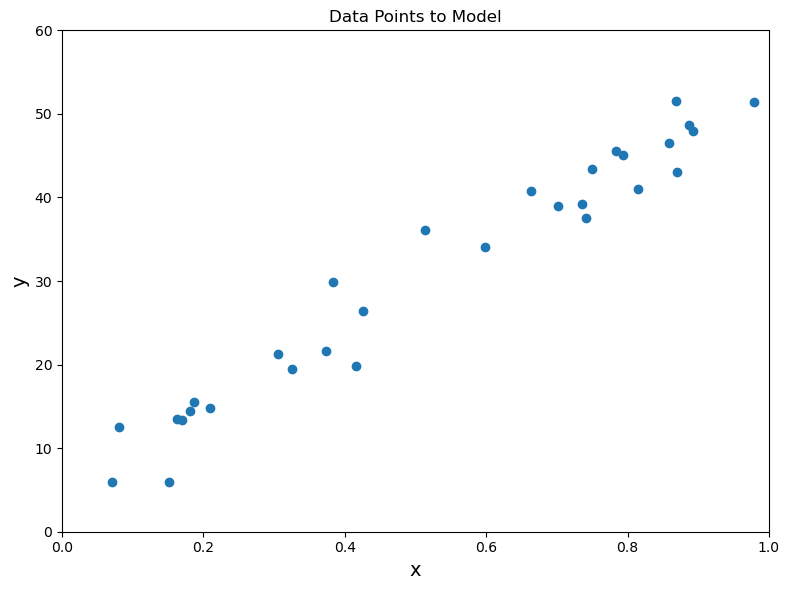

In [115]:
f, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y)

ax.set_title('Data Points to Model')
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_xlim(0, 1)
ax.set_ylim(0, 60)
plt.tight_layout()

If we wanted to make a best-fit line, what would you guess? Let's create a couple functions to make this easier to make a guess.

In [116]:
# Plotting a guess of a regression line
def regression_formula(x, a, b):
    return a*x + b

def plot_data_and_guess(slope, intercept, ax, x1=x, x2=y, **kwargs):
    '''
    Plot our data and regression line on the given axis.

    Arguments:
        slope : float
            Value for the slope the regression line.
            
        intercept : float
            Value for the intercept the regression line.
        
        ax : Axes
            Axis to plot data and regression line
        
        x1 : array-like
            Values along the x-axis
        
        x2 : array-like
            Values along the y-axis
        
    Returns:
        fig : Figure

        ax : Axes
    '''
    # Plot data and regression line
    ax.scatter(x1, x2)
    yhat = regression_formula(x1, slope, intercept)
    ax.plot(x1, yhat, 'r-', **kwargs)
    
    # Embelishments
    ax.set_title('Data Points to Model')
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('y', fontsize=14)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 60)

    return ax

So what do you think the regression parameters are?

<Axes: title={'center': 'Data Points to Model'}, xlabel='x', ylabel='y'>

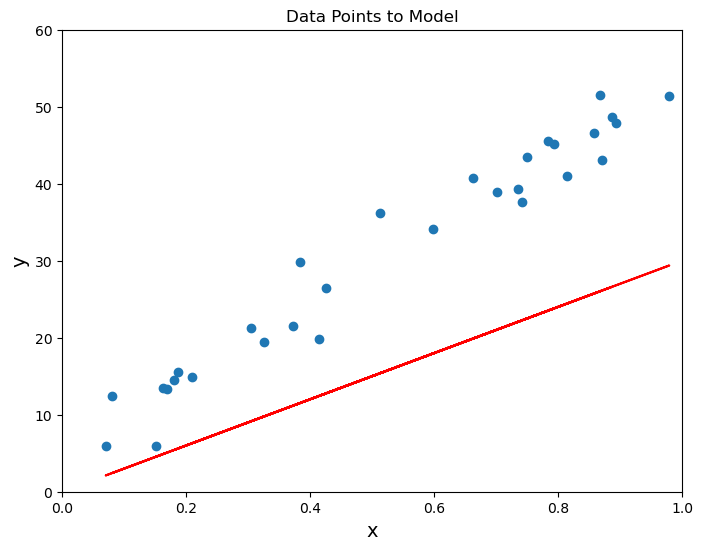

In [117]:
# Our guess
guess = {
    'slope': 30,
    'intercept': 0
}

f, ax = plt.subplots(figsize=(8, 6))
plot_data_and_guess(**guess, ax=ax)

What would be your next guess be? 

- How can we tell when our guess is "better"?
- Could we formalize this?

### The Loss Function

One way we can know how well our guess or _model_ did is to compare the predicted values with the actual values. These are the _residuals_.

So this would give us the error for each data point:

$$ r_i = \hat{y}_i - y_i $$

In [118]:
def calculate_residuals(x_values, y_values, slope, intercept):
    '''Find the residulas for each data point'''
    yhat = intercept + slope*x_values
    errors = y_values - yhat
    return errors

Then we can go further by having just one number to represent how faithful our model was to the actual y-values.

This leads us to the idea of the **mean squared error** or **MSE**. This is all the residuals squared and then averaged:

$$ MSE = \frac{1}{n} \sum_{i}^{n} (\hat{y}_i - y_i)^2 $$

In [119]:
def mse(x_values, y_values, slope, intercept):
    
    resid_sq = calculate_residuals(x_values, y_values, slope, intercept)**2 

    return sum(resid_sq) / len(x_values)

In [120]:
# Use our guess from earlier
slope = guess.get('slope')
intercept = guess.get('intercept')

mse(x, y, slope, intercept)

262.114879650247

> The function we use to find how bad our model did in prediction is typically called the **loss function**.

What we found here is great! We can now compare different models with one another.

If we made a few different guesses, we could make our predictions and then calculate from the _loss function_ how good or bad our model did! We will want to find the _smallest loss_.

### The Cost Function

Now our model changes based on the different model _parameters_ (the coefficients $\beta_i$ for linear regression). 

If we imagine all the different ways we can adjust these parameters $\vec{\theta}$ and measure how well the model performs with the loss or **cost function** $J(\vec{\theta})$, we can plot this as a surface in this multidimensional plane. See the image below:

![](images/gradientdescent.png)

> Note that the terms **loss function** and **cost function** are frequently used interchangeably. Sometimes they are the same function, but sometimes they differ by making changes in the cost to improve _training_ or _learning_.

Let's try creating the cost function's curve/surface for just one parameter (slope) using our earlier data example:

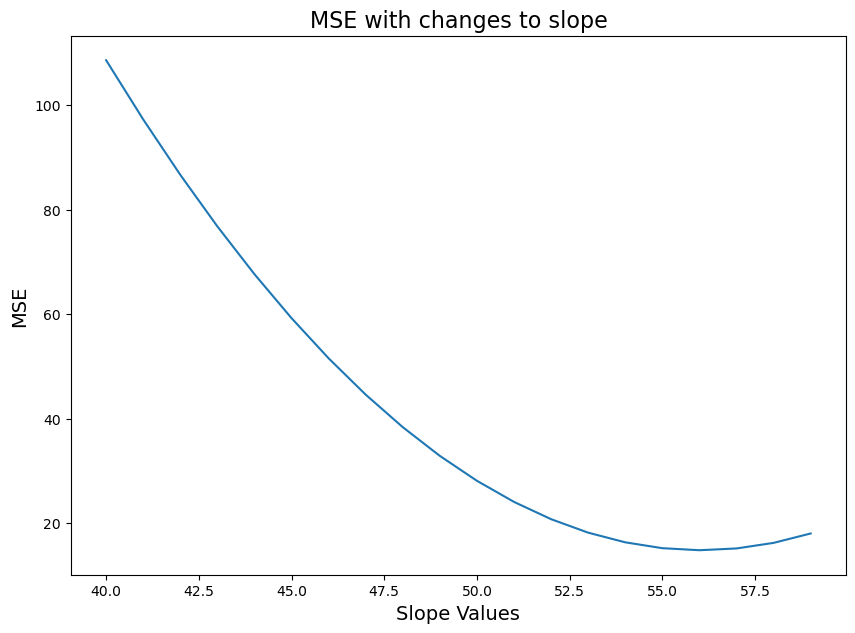

In [121]:
table = np.zeros((20, 2))
# Find the MSE for different slope values
for idx, val in enumerate(range(40, 60)):
    table[idx, 0] = val
    table[idx, 1] = mse(x, y, slope=val, intercept=0)

plt.figure(figsize=(10, 7))
plt.plot(table[:, 0], table[:, 1], '-')
plt.xlabel("Slope Values", fontsize=14)
plt.ylabel("MSE", fontsize=14)
plt.title("MSE with changes to slope", fontsize=16);

Based on this graph, what is the optimal slope value?

How could we extend this to find the best slope _and_ intercept combination?

### Better Way of Guessing: Gradient Descent

So this probably all sounds great! We just need to find the minimum of the cost function!

But there's some bad news; we don't usually know what the cost function (which can be complicated!) "looks" like without trying a whole lot of different parameters $\vec{\theta}$. We'd need an _infinite_ number of parameter combinations to know $J(\vec{\theta})$ completely.

So what can we do?

Well, we can take one "guess" (set of  parameters) and then measure $J(\vec{\theta})$. Then we can adjust our guess/parameters in a "good" direction, "down the hill". This is the basic idea of gradient descent.

> **Gradient descent** is an optimization procedure that uses the _gradient_ (a generalized notion of a derivative) of the cost function.

So how do we find this "better" guess? Well, we need to find the best direction to move "downhill" the fastest. We can do this with a generalization of the derivative called the **gradient**:

$$\begin{align}\\
    \large -\nabla J &= -\sum_i \dfrac{\partial J}{\partial \theta_i}\hat{\theta_i} \\
            &= -\frac{\partial J}{\partial \theta_1}\hat{\theta_1} + \dots +  \frac{\partial J}{\partial \theta_n}\hat{\theta_n}
\end{align}$$

In the multivariate case, the gradient tells us how the function is changing **in each dimension**. A large value of the derivative with respect to a particular variable means that the gradient will have a large component in the corresponding direction. Therefore, **the gradient will point in the direction of steepest increase**.

### Gradient Descent in Words

- Make a guess at where the function attains its minimum value
- Calculate the gradient/derivative at that point
- Use that value to decide how to make your next guess!

Repeat until we get the derivative as close as we like to 0.

If we want to improve our guess at the minimum of our loss function, we'll move in the **opposite direction** of the gradient away from our last guess. Hence we are using the *gradient* of our loss function to *descend* to the minimum value of the relevant loss function.

### Stepping Down a Hill: Step Size

So we now have the basic idea of gradient descent of "going down a hill" and hopefully it's obvious that the steeper the hill, the more we can adjust our parameters to get to "bottom" (optimal parameters) faster.

But a big question is how big of a step do we take?

> The amount we adjust our parameter is determined by our **step size**.

If our steps are _too big_, we risk skipping over the minimum value (optimal parameters).

If our steps are _too small_, it might take us too long to reach the minimum value.

![learning_rate](https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png)

Here's an elegant solution: Make the size of your step **proportional to the value of the derivative at the point where you currently are in parameter space**! If we're very far from the minimum, then our values will be large, and so we therefore ca safely take a large step; if we're close to the minimum, then our values will be small, and so we should therefore take a smaller step.

I said the size of the step is proportional to the value of the derivative. The constant of proportionality is often called the **"learning rate"**. 

This page helps to explain the dangers of learning rates that are too large and too small: https://www.jeremyjordan.me/nn-learning-rate/.

> Note there are other optimizations we can do for gradient descent that rely on adjusting our cost function or how we take steps or both.

### Putting It All Together

The general algorithm looks like this:

We'll make a guess, $\vec{s}$, at where our loss function attains a minimum. If we're not happy with how close the value of the gradient there is to 0, then we'll make a new guess, and the new guess will be constructed as follows:

$\large\vec{s}_{new} = \vec{s}_{old} - \alpha\nabla f(\vec{s}_{old})$,

where $\alpha$ is the learning rate.

In the one-dimensional case, we'll have:

$\large x_{new} = x_{old} - \alpha\frac{df}{dx}|_{x_{old}}$.

### Gradient Descent Walkthrough

Let's go back to our original example and implement gradient descent to find the optimal parameters (slope and intercept).

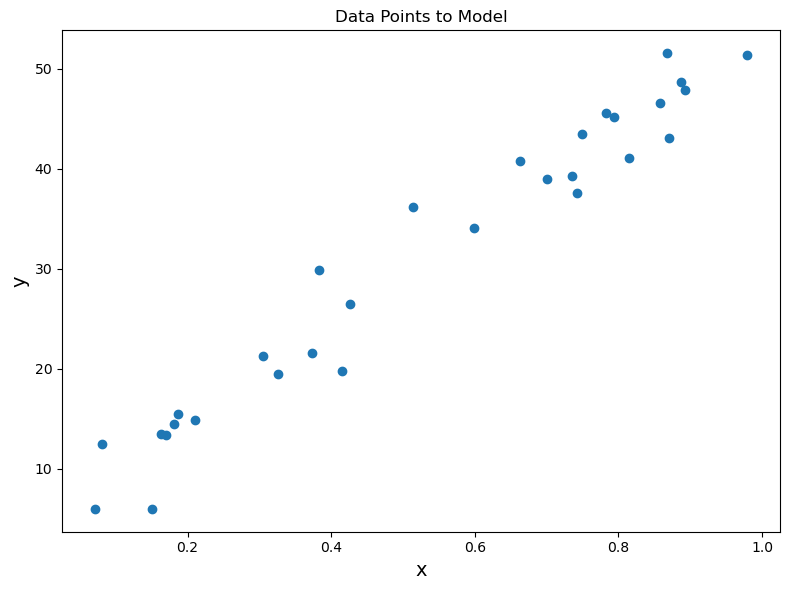

In [122]:
f, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y)

ax.set_title('Data Points to Model')
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)

plt.tight_layout()

First we need to find the gradient for the cost function (2-dimensions: $a$ & $b$; slope & intercept):

$$ \frac{\partial}{\partial b}\frac{1}{n}\Sigma(y_i - (b + ax_i))^2 = -\frac{2}{n}\Sigma (y_i-ax_i - b)$$

$$ \frac{\partial}{\partial a}\frac{1}{n}\Sigma(y_i - (b + ax_i))^2 = -\frac{2}{n}\Sigma x_i (y_i-ax_i - b)$$

Let's formalize this into a function:

In [123]:
def partial_deriv(a, b, x_i, y_i, respect_to):
    '''
    Get the partial derivative for cost function with respect to slope (a) 
    or intercept (b).
    '''
    if respect_to == 'b': # intercept
        return (y_i - (a * x_i + b))
    elif respect_to == 'a': # slope
        return (x_i * (y_i - (a * x_i + b)))
    else:
        print('Choose either respect_to: a or b ')
        return 0

Observe: In the code above we've left out both the factors of two and the averages!

- We'll take care of the averages below, but this is easily done because **the derivative of a sum is equal to the sum of the derivatives**: $\frac{d}{dx}[f(x) + g(x)] = \frac{df}{dx} + \frac{dg}{dx}$.

- The factors of two won't make any difference to our goals. Very often the cost function associated with some modeling task will be something like MSE and so have a squared term, and so then when we differentiate it we'll gain a factor of two. Clearly, minimizing $f(\beta)$ and minimizing $2f(\beta)$ will yield the same optimal $\beta$, and so it's often convenient to leave off the factor of two from the expression of the derivative and so minimize the **half mean squared error** function: $\frac{1}{2}\Sigma(y - \hat{y})^2$.

Next let's define the step we take (amount we adjust the parameters by) using the gradient and learning rate:

In [124]:
def step_gradient(a, b, x, y, learning_rate):
    db = 0
    da = 0 
    # For each data point, update the derivative for the slope & intercept
    N = len(x)
    for i in range(N):
        
        # Partial derivatives of loss/cost function with respect to b & a
        # Here's where we're taking our averages. Notice that we're leaving
        # off the factors of 2.
        db +=  -(1/N) * partial_deriv(a, b, x[i], y[i], respect_to='b')
        da +=  -(1/N) * partial_deriv(a, b, x[i], y[i], respect_to='a')
        
    # Adjust the slope & intercept by the gradient
    new_b = b - (learning_rate * db)
    new_a = a - (learning_rate * da)
    
    return (new_a, new_b)

Let's try it out and keep track of our guesses:

In [125]:
guesses = []
alpha = .2

In [126]:
# Our guess
guess = {
    'slope': 60,
    'intercept': 10
}

guesses.append(guess)

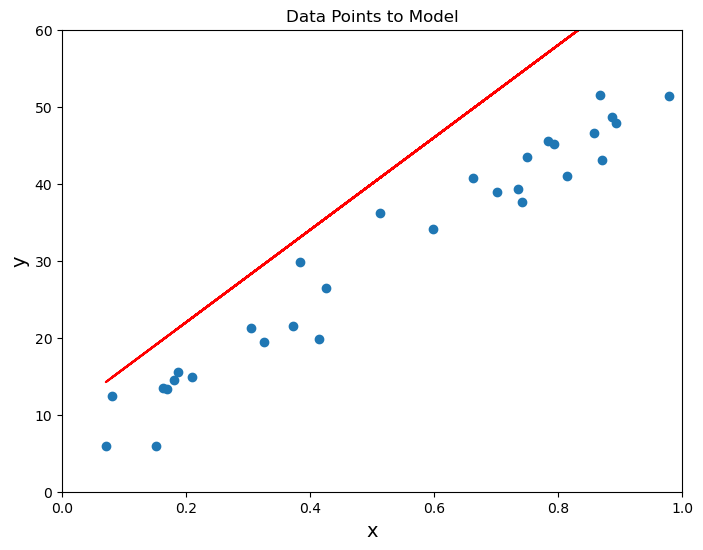

In [127]:
f, ax = plt.subplots(figsize=(8, 6))
plot_data_and_guess(**guess, ax=ax);

In [128]:
step = step_gradient(guess['slope'], guess['intercept'], x, y, learning_rate=alpha)
step

(58.65133549465324, 7.8147750430508145)

In [129]:
mse(x, y, guess['slope'], guess['intercept'])

139.0871456161772

Let's update our guess and try again:

(57.63258035565282, 6.209478048652821)

81.7071555584808

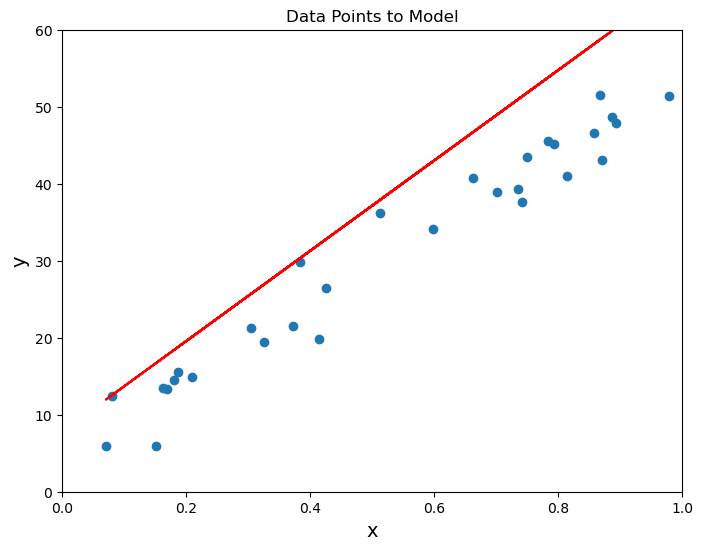

In [130]:
# Our guess using the new step
new_slope, new_intercept = step
guess = {
    'slope': new_slope,
    'intercept': new_intercept
}
guesses.append(guess)

# Getting adjusted parameters
step = step_gradient(guess['slope'], guess['intercept'], x, y, learning_rate=alpha)
display(step)
display(mse(x, y, guess['slope'], guess['intercept']))

# Plotting out our new parameters
f, ax = plt.subplots(figsize=(8, 6))
plot_data_and_guess(**guess, ax=ax);

Let's repeat this another 200 times:

In [131]:
for i in range(200):
    # Our guess using the new step
    new_slope, new_intercept = step
    guess = {
        'slope': new_slope,
        'intercept': new_intercept
    }
    guesses.append(guess)

    # Getting adjusted parameters
    step = step_gradient(guess['slope'], guess['intercept'], x, y, learning_rate=alpha)
    #  Only display every 10
    if (i % 10) == 0:
        print(f'Step # {i}:')
        display(step)
        display(mse(x, y, guess['slope'], guess['intercept']))
        print('-'*30)

Step # 0:


(56.858224669188935, 5.033171492002283)

50.24695211676063

------------------------------
Step # 10:


(54.22203172652223, 2.15650882733859)

11.585497509587851

------------------------------
Step # 20:


(53.46065181682481, 2.3726070401501924)

10.889789464125494

------------------------------
Step # 30:


(52.86877808785312, 2.6972525240526126)

10.42428369172027

------------------------------
Step # 40:


(52.353013124987974, 2.9888612310097447)

10.065792208969151

------------------------------
Step # 50:


(51.90047575287413, 3.2451535778499743)

9.789582452011517

------------------------------
Step # 60:


(51.50326144084098, 3.4701352527727383)

9.576768626259064

------------------------------
Step # 70:


(51.15459934103059, 3.667618064706619)

9.412800035346981

------------------------------
Step # 80:


(50.84855445796471, 3.8409624634831574)

9.286465673793948

------------------------------
Step # 90:


(50.579917640568375, 3.9931188658756755)

9.189127696927574

------------------------------
Step # 100:


(50.34411647567383, 4.126677092598445)

9.11413082652774

------------------------------
Step # 110:


(50.13713744012517, 4.243910410637748)

9.05634731025956

------------------------------
Step # 120:


(49.95545758635376, 4.346814224167081)

9.011826322456818

------------------------------
Step # 130:


(49.79598457895991, 4.437140037817664)

8.977523834776203

------------------------------
Step # 140:


(49.65600406070587, 4.516425268673695)

8.951094487199901

------------------------------
Step # 150:


(49.53313345199979, 4.586019414331893)

8.930731229006723

------------------------------
Step # 160:


(49.42528139749887, 4.647107022422348)

8.915041765502371

------------------------------
Step # 170:


(49.330612169580476, 4.70072785254994)

8.902953362815571

------------------------------
Step # 180:


(49.24751442280006, 4.747794573828572)

8.89363950198932

------------------------------
Step # 190:


(49.17457376751199, 4.78910829923434)

8.886463367495915

------------------------------


What does our final result look like?

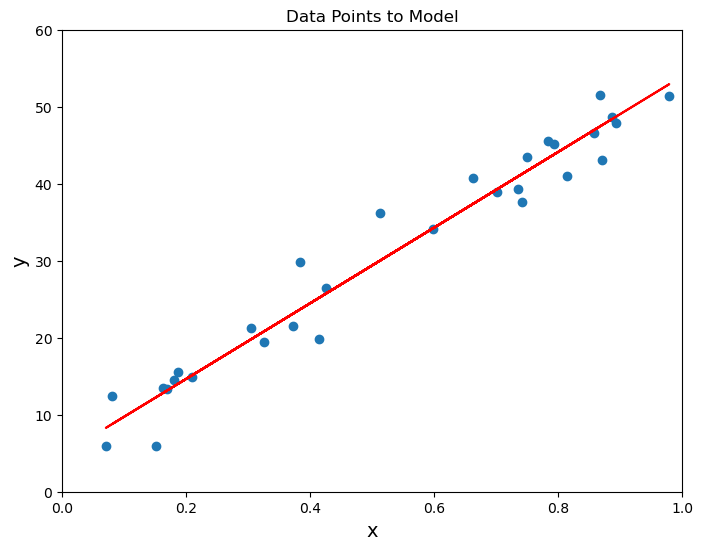

In [132]:
# Plotting out our new parameters
f, ax = plt.subplots(figsize=(8, 6))
plot_data_and_guess(**guesses[-1], ax=ax);

Let's take a look at the MSE over the guesses:

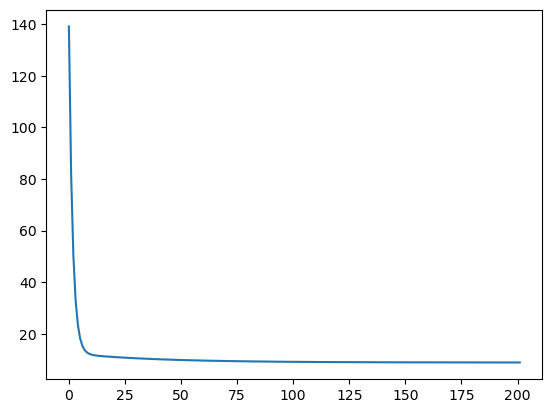

In [133]:
mses = [
    mse(x, y, d['slope'], d['intercept']) for d in guesses
]
plt.plot(range(len(mses)), mses);

This was what we had for 200 iterations. What could we do to improve or speed up this method?

## Level Up: Distance Calculations

There are many times when we need to measure distances. For example, many modeling algorithms rely on a notion of **similarity** between data points. But we have already seen how distance is used to construct a linear model: Choose the betas that minimize the sum of squared **distances** between true and predicted $y$-values.

Consider this distance for *all* data points at once: We can think of that as a vector: $\vec{(y_i - \hat{y_i})^2}$.

And in fact there are multiple ways to measure the magnitude of a vector. Typically, we are thinking of Euclidean spaces and so use the **L2 norm** to measure the magnitude of a vector:

In [134]:
my_vec = np.array([3, 4, 12])

np.sqrt(3**2 + 4**2 + 12**2)

13.0

In [135]:
np.linalg.norm(my_vec)

13.0

But there are other norms we can use. In general, the **$n$-norm** will calculate $(x_1^n + ... + x_m^n)^{\frac{1}{n}}$ for a vector $\vec{x_i}$.

In [136]:
np.linalg.norm(my_vec, ord=1)

19.0

### Enter Minkowski Distance

[Can take the form of many distances](https://en.wikipedia.org/wiki/Minkowski_distance)

[Blog post](https://www.kdnuggets.com/2023/03/distance-metrics-euclidean-manhattan-minkowski-oh.html)

## Level Up: Eigenvalues, Singular Values, Principal Components

It is often useful to express a matrix as a **product** of other matrices. Sometimes the gain is only in computational efficiency, but there are also certain factorizations or **decompositions** that are useful in other ways.

An **eigendecomposition** reduces a matrix to a collection of vectors that capture the *linear* action of the matrix. Selecting the vectors that produce the largest such linear transformations is the idea behind **principal component analysis**, which is useful for reducing high-dimensional datasets to lower-dimensional problems.

Eigendecompositions are possibly only for square matrices; a **singular value decomposition** is a more fundamental matrix factorization that can be applied to any matrix.

### Recommendation Systems

How do recommendation engines work?

Imagine representing your interests (film genres, book subjects, music styles) as a **vector**: larger numbers represent larger preferences. Now do this for multiple people. Now we can think of comparing these vectors directly or against some target such as whether a given product/service was used/bought/watched.

### Clustering

When our data is **unlabeled** we have a problem in **unsupervised learning**. One major strategy for this type of problem is to impose a *similarity* metric on our data points. Similarity between data points is measured as some function of the **(vector) distance** between them.

### Cosine Similarity

One similarity metric for vectors is **cosine similarity**, which computes the *cosine of the angle between them*. Note that this is always well-defined for non-zero vectors since any two vectors determine a plane (in which the angle can be measured).

### Images

We saw already above the idea of representing a digital image as a **tensor** of values that encode facts about each pixel in the digitization.

**Neural networks** are good for working with tensors of high dimension. Such objects often need to be manipulated into different shapes, and the `.reshape()` method is great for this.

In [137]:
# Bringing back our tensor variable from above

tensor

array([[[0.4, 1. , 0.7, 0.6, 0.2],
        [0.2, 0.1, 0.9, 0.6, 0.7],
        [0. , 1. , 0.8, 0.2, 0.2],
        [0.2, 0.3, 0.5, 0.4, 0.3],
        [0.6, 0.1, 0.3, 0.4, 0.5]],

       [[0.8, 0.2, 0.5, 0.6, 0. ],
        [0.6, 0.2, 0.1, 0.9, 1. ],
        [0.8, 0.3, 0.1, 0.7, 0.4],
        [0.1, 0.5, 0. , 0.9, 0.3],
        [0.7, 0.3, 0.5, 0.5, 0.2]],

       [[1. , 0.8, 0.9, 0.9, 0.6],
        [0.9, 0.1, 0.2, 0. , 0.3],
        [0.4, 0.3, 0.8, 0.4, 0.3],
        [0.5, 0.1, 0.8, 0.1, 1. ],
        [0.8, 0.2, 0. , 0.8, 0.7]]])

In [138]:
tensor.reshape(5, 15)

tensor.reshape(1, 75)

array([[0.4, 1. , 0.7, 0.6, 0.2, 0.2, 0.1, 0.9, 0.6, 0.7, 0. , 1. , 0.8,
        0.2, 0.2, 0.2, 0.3, 0.5, 0.4, 0.3, 0.6, 0.1, 0.3, 0.4, 0.5, 0.8,
        0.2, 0.5, 0.6, 0. , 0.6, 0.2, 0.1, 0.9, 1. , 0.8, 0.3, 0.1, 0.7,
        0.4, 0.1, 0.5, 0. , 0.9, 0.3, 0.7, 0.3, 0.5, 0.5, 0.2, 1. , 0.8,
        0.9, 0.9, 0.6, 0.9, 0.1, 0.2, 0. , 0.3, 0.4, 0.3, 0.8, 0.4, 0.3,
        0.5, 0.1, 0.8, 0.1, 1. , 0.8, 0.2, 0. , 0.8, 0.7]])